<a href="https://colab.research.google.com/github/kairi812/Machine-Learning-Beginners/blob/main/clustering_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score

     |████████████████████████████████| 540 kB 4.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=cb066c1c4ade6a72818d00c6740141db3568814a57dcbbc3b910f3e3e088c69c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


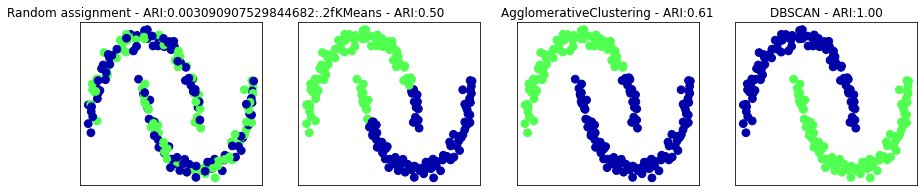

In [7]:
from numpy import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 利用するアルゴリズムリストを作成
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# プロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:{}:.2f".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [8]:
from sklearn.metrics import accuracy_score

cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]

print("Accuracy: {:2f}".format(accuracy_score(cluster1, cluster2)))
print("ARI: {:2f}".format(adjusted_rand_score(cluster1, cluster2)))

Accuracy: 0.000000
ARI: 1.000000


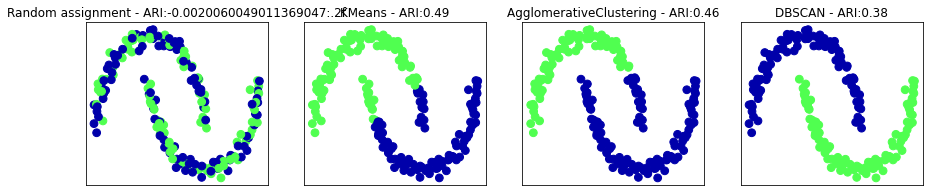

In [10]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 利用するアルゴリズムリストを作成
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# プロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:{}:.2f".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))